## Importing Libraries and Data

In [39]:
# import warnings
# warnings.filterwarnings('ignore')

In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [41]:
df1 = pd.read_csv('bengaluru_house_prices.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [42]:
df1.shape

(13320, 9)

## Data Preprocessing

'Area Type' Column Values

In [43]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

'Availability' Column Values

In [44]:
df1.groupby('availability')['availability'].agg('count')

availability
14-Jul                      1
14-Nov                      1
15-Aug                      1
15-Dec                      1
15-Jun                      1
                        ...  
22-Mar                      3
22-May                     10
22-Nov                      2
Immediate Possession       16
Ready To Move           10581
Name: availability, Length: 81, dtype: int64

'Society' Column Values

In [45]:
df1.groupby('society')['society'].agg('count')

society
3Codeli    2
7 ise P    1
A idse     2
A rtsai    1
ACersd     1
          ..
Zonce E    2
Zostaa     3
i1ncyRe    1
i1odsne    1
i1rtsCo    3
Name: society, Length: 2688, dtype: int64

Distribution of Null Values

In [46]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

'Balcony' Column Values

In [47]:
df1.groupby('balcony')['balcony'].agg('count')

balcony
0.0    1029
1.0    4897
2.0    5113
3.0    1672
Name: balcony, dtype: int64

In [48]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

Dropping features which are not necessary

In [49]:
df1.drop(['availability','society'], axis='columns', inplace=True)
df1.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


Dropping Null(NaN) values

In [50]:
df2 = df1.dropna(subset=df1.columns.difference(['balcony']))
df2.isnull().sum()

area_type       0
location        0
size            0
total_sqft      0
bath            0
balcony       536
price           0
dtype: int64

In [51]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

Handling Inconsistencies

In [52]:
df2['bhk'] = df2['size'].apply(lambda x : int(x.split(' ')[0]))
df2.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_2132\1989152296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x : int(x.split(' ')[0]))


,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [53]:
# Function for checking float values
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [54]:
df2[~df2['total_sqft'].apply(is_float)].head(30)

,area_type,location,size,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
648,Built-up Area,Arekere,9 Bedroom,4125Perch,9.0,NaN,265.000,9
661,Super built-up Area,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Built-up Area,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4


In [55]:
import re

# Conversion function
def convert_to_sqft(value):
    try:
        # Check if the value is a range
        if '-' in value:
            parts = value.split('-')
            return (float(parts[0]) + float(parts[1])) / 2
        
        # Check for different units and convert to square feet
        if 'Sq. Meter' in value:
            match = re.findall(r"\d+\.?\d*", value)
            return float(match[0]) * 10.7639 if match else np.nan
        if 'Perch' in value:
            match = re.findall(r"\d+\.?\d*", value)
            return float(match[0]) * 272.25 if match else np.nan
        if 'Sq. Yards' in value:
            match = re.findall(r"\d+\.?\d*", value)
            return float(match[0]) * 9 if match else np.nan
        if 'Acres' in value:
            match = re.findall(r"\d+\.?\d*", value)
            return float(match[0]) * 43560 if match else np.nan
        
        # Assume the value is in square feet if no unit is specified
        return float(value)
    except Exception as e:
        print(f"Error processing value: {value}, Error: {e}")
        return np.nan

In [56]:
# Apply the conversion function to 'total_sqft' column
df2['total_sqft'] = df2['total_sqft'].apply(lambda x: convert_to_sqft(str(x)))

# Now you can access the DataFrame directly
df2.head()

Error processing value: 3Cents, Error: could not convert string to float: '3Cents'
Error processing value: 24Guntha, Error: could not convert string to float: '24Guntha'
Error processing value: 1500Cents, Error: could not convert string to float: '1500Cents'
Error processing value: 1Grounds, Error: could not convert string to float: '1Grounds'
Error processing value: 38Guntha, Error: could not convert string to float: '38Guntha'


C:\Users\Asus\AppData\Local\Temp\ipykernel_2132\1698540141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_sqft'] = df2['total_sqft'].apply(lambda x: convert_to_sqft(str(x)))


,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [57]:
df2[~df2['total_sqft'].apply(is_float)]

,area_type,location,size,total_sqft,bath,balcony,price,bhk


In [58]:
df2.loc[648]

area_type     Built-up  Area
location             Arekere
size               9 Bedroom
total_sqft        1123031.25
bath                     9.0
balcony                  NaN
price                  265.0
bhk                        9
Name: 648, dtype: object

In [59]:
df2.isnull().sum()

area_type       0
location        0
size            0
total_sqft      5
bath            0
balcony       536
price           0
bhk             0
dtype: int64

In [60]:
df2.dropna(subset=['total_sqft'], inplace=True)
df2.isnull().sum()

C:\Users\Asus\AppData\Local\Temp\ipykernel_2132\4259447186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset=['total_sqft'], inplace=True)


area_type       0
location        0
size            0
total_sqft      0
bath            0
balcony       536
price           0
bhk             0
dtype: int64

In [61]:
df3 = df2.copy()
df3['price_per_sqft'] = df3['price']*100000/df3['total_sqft']
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [62]:
len(df3.location.unique())

1303

In [63]:
df3.location = df3.location.apply(lambda x : x.strip())

location_values = df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_values

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura main  Road      1
Kannur                     1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1292, dtype: int64

In [64]:
len(location_values[location_values <= 10])

1052

In [65]:
location_values_less_10 = location_values[location_values <= 10]

df3.location = df3.location.apply(lambda x : 'Other' if x in location_values_less_10 else x)
len(df3.location.unique())

241

### Outlier Removal

#### Using Business Logic

In [66]:
df3[df3.total_sqft/df3.bhk < 300].head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,Plot Area,Other,6 Bedroom,1020.0,6.0,NaN,370.0,6,36274.509804
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,NaN,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,Other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000


In [67]:
df3.shape

(13241, 9)

In [68]:
df4 = df3[~(df3.total_sqft/df3.bhk < 300)]
df4.shape

(12494, 9)

#### Using Mean & Standard Deviation

In [69]:
df4.price_per_sqft.describe()

count     12494.000000
mean       6300.549750
std        4168.742581
min           2.257423
25%        4205.283570
50%        5291.005291
75%        6916.913702
max      176470.588235
Name: price_per_sqft, dtype: float64

In [70]:
def remove_price_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mn = subdf.price_per_sqft.mean()
        sd = subdf.price_per_sqft.std()
        filtered_df = subdf[(subdf.price_per_sqft>(mn-sd)) & (subdf.price_per_sqft <=(mn+sd))]
        df_out = pd.concat([df_out, filtered_df], ignore_index=True)
    return df_out

In [71]:
df5 = remove_price_outliers(df4)
df5.shape

(10314, 9)

In [72]:
def plot_scatterchart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (10,6)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color='green', marker='+', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh. Indian Rupees)")
    plt.title(location)
    plt.legend()

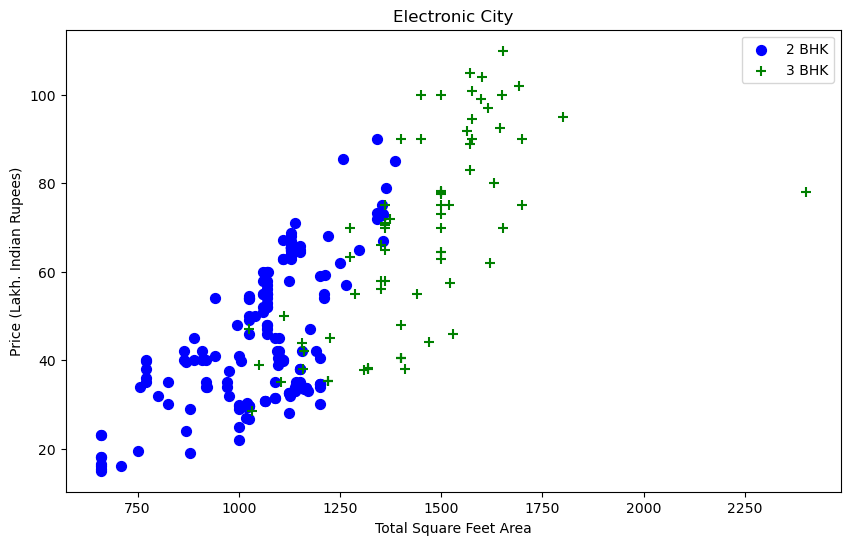

In [73]:
plot_scatterchart(df5,"Electronic City")

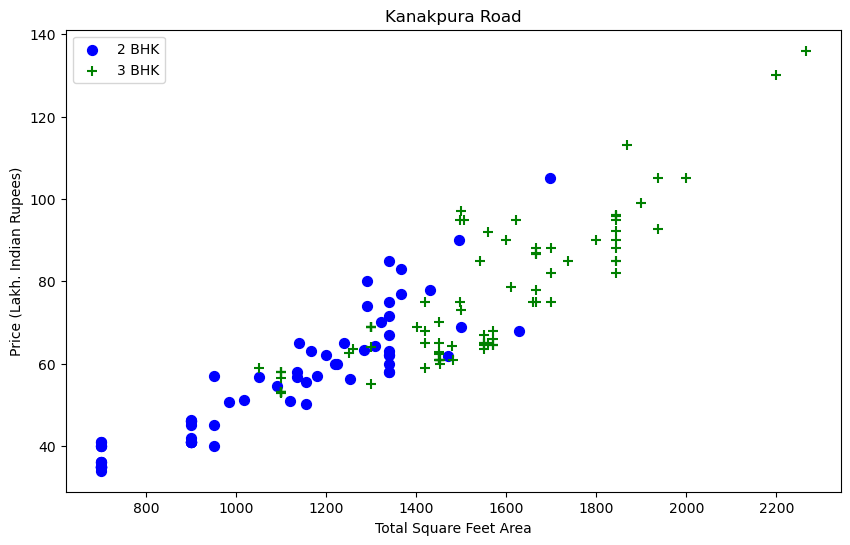

In [74]:
plot_scatterchart(df5,"Kanakpura Road")

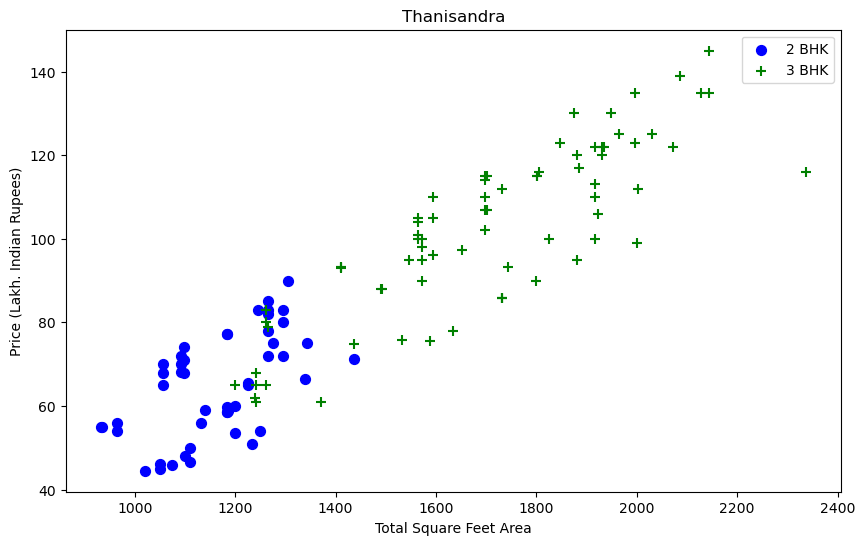

In [75]:
plot_scatterchart(df5,"Thanisandra")

In [76]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : bhk_df.price_per_sqft.mean(),
                'std' : bhk_df.price_per_sqft.std(),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [77]:
df6 = remove_bhk_outliers(df5)
df6.shape

(7379, 9)

#### Using 'Bathrooms' feature

In [189]:
df6.bath.unique()

array([ 4.,  3.,  2.,  5.,  1.,  8.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

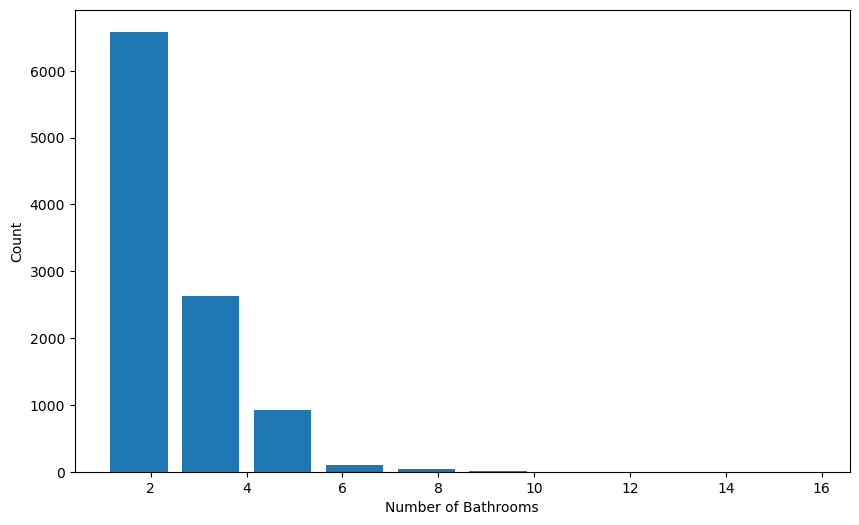

In [190]:
plt.hist(df6.bath, rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [191]:
df6[df6.bath > 10]

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
5323,Super built-up Area,Neeladri Nagar,10 BHK,4000.0,12.0,NaN,160.0,10,4000.000000
5974,Super built-up Area,Other,10 BHK,12000.0,12.0,NaN,525.0,10,4375.000000
6063,Super built-up Area,Other,16 BHK,10000.0,16.0,NaN,550.0,16,5500.000000
6799,Super built-up Area,Other,11 BHK,6000.0,12.0,NaN,150.0,11,2500.000000
7131,Super built-up Area,Other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


It's unusual to have 2 more bathrooms than the number of bedrooms

In [192]:
df6[df6.bath > df6.bhk+2]

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1643,Built-up Area,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
5284,Built-up Area,Nagasandra,4 Bedroom,7000.0,8.0,NaN,450.0,4,6428.571429
5898,Super built-up Area,Other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689
9081,Super built-up Area,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330


In [193]:
df7 = df6[df6.bath < df6.bhk+2]
df7.shape

(10219, 9)